##Логистическая регрессия

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gkalpolukcu/knn-algorithm-dataset")

print("Path to dataset files:", path)

100%|██████████| 48.7k/48.7k [00:00<00:00, 35.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1


In [3]:
import pandas as pd

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id','Unnamed: 32'],axis=1)

[[84  4]
 [ 2 53]]
              precision    recall  f1-score   support

           B       0.98      0.95      0.97        88
           M       0.93      0.96      0.95        55

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

ROC AUC Score: 0.9873966942148761


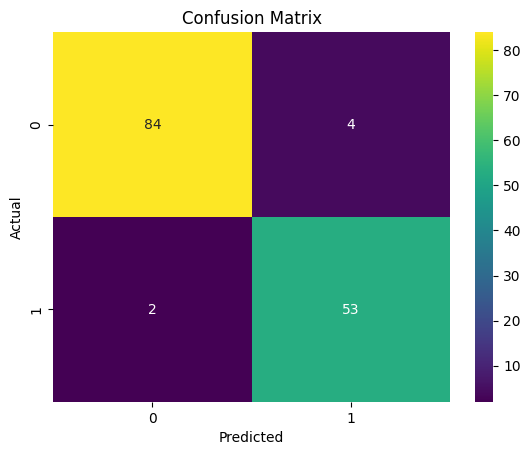

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

scaler = StandardScaler()
logistic_model = LogisticRegression()
pipl = Pipeline([('scaler', scaler), ('logistic_model', logistic_model)])

param_grid = {'logistic_model__C': [0.001, 0.01, 0.1, 1, 10, 100]}
final_model = GridSearchCV(estimator=pipl, param_grid=param_grid, cv=5, scoring='accuracy')
final_model.fit(X_train, y_train)


y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


###Улучшенный бейзлайн

Для улучшения бейзлайна используется весь набор признаков, сокращен диапазон значений для C до [0.01, 0.1, 1, 10, 100], использованы 5 фолдов в кросс-валидации.

[[84  4]
 [ 2 53]]
              precision    recall  f1-score   support

           B       0.98      0.95      0.97        88
           M       0.93      0.96      0.95        55

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

ROC AUC Score: 0.9878099173553719


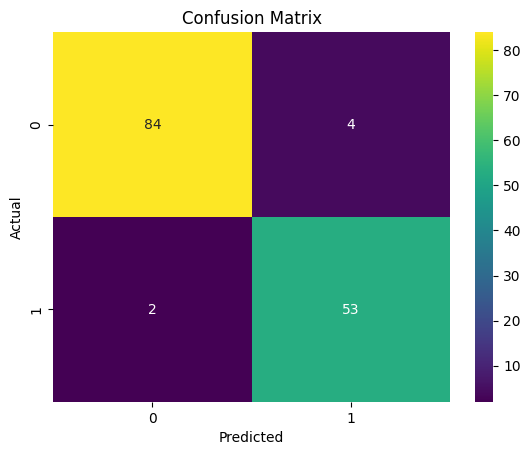

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)

X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


X.fillna(X.mean(), inplace=True)

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

logistic_model = LogisticRegression(solver='liblinear')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                            ('logistic_model', logistic_model)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

param_grid = {
    'logistic_model__C': [0.01, 0.1, 1, 10, 100],
    'logistic_model__penalty': ['l1', 'l2']
}

final_model = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, final_model.predict_proba(X_test)[:, 1])
print(f'ROC AUC Score: {roc_auc}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Даже если не изменилась точность, то возрасла площадь под кривой, что тоже хороший показатель

##Линейная регрессия

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/netflix-imdb-scores")

print("Path to dataset files:", path)

100%|██████████| 699k/699k [00:00<00:00, 55.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

In [14]:
from sklearn.linear_model import LinearRegression


X = data[['release_year', 'runtime', 'imdb_votes']]
y = data['imdb_score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.3134812280266586
Mean Absolute Error: 0.8866432250687594
R² Score: 0.07757997065351963


###Улучшеный бейзлайн

Для улучшения результатов производится стандартизация признаков перед полиномиальной трансформацией, используется GridSearchCV для поиска лучшего значения alpha

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')


data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes', 'type', 'age_certification']]
y = data['imdb_score']

X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

ridge_reg = Ridge()
param_grid = {'alpha': np.logspace(-3, 3, 7)}
grid_search = GridSearchCV(ridge_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.167812833199352
Mean Absolute Error: 0.8119585675791519
R² Score: 0.1798786881108898


Показания метрик улучшились, но все еще не являются очень высокими

##Самостоятельная реализация

[[88  0]
 [ 4 51]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        88
           1       1.00      0.93      0.96        55

    accuracy                           0.97       143
   macro avg       0.98      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143

ROC AUC Score: 1.0


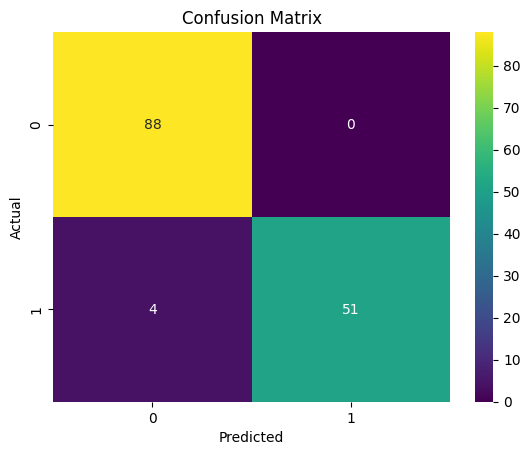

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)
X = data.drop('diagnosis', axis=1).values
y = (data['diagnosis'] == 'M').astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

model = LogisticRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, model.sigmoid(np.dot(X_test_scaled, model.weights) + model.bias))
print(f'ROC AUC Score: {roc_auc}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Вариант с улучшенным бейзлайном

<ipython-input-31-d003dc4802de>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-31-d003dc4802de>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-31-d003dc4802de>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-31-d003dc4802de>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-31-d003dc4802de>:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


[[87  1]
 [ 1 54]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        55

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

ROC AUC Score: 0.9977272727272727


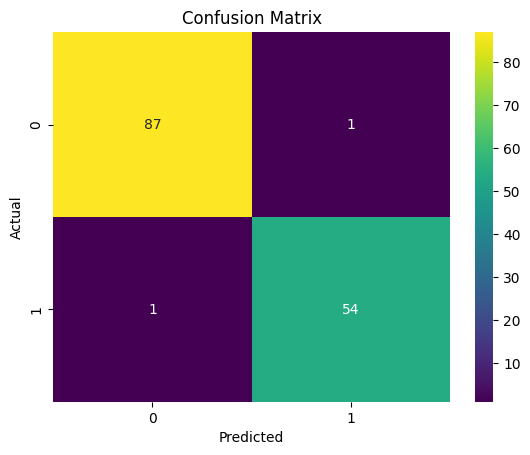

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

data = pd.read_csv('/root/.cache/kagglehub/datasets/gkalpolukcu/knn-algorithm-dataset/versions/1/KNNAlgorithmDataset.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)
X = data.drop('diagnosis', axis=1).values
y = (data['diagnosis'] == 'M').astype(int).values

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_scaled = standardize(X)

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

def cross_validate(X, y, model_class, C_values, n_splits=5):
    kf = KFold(n_splits=n_splits)
    best_score = 0
    best_model = None

    for C in C_values:
        model = model_class(learning_rate=1/C, n_iterations=1000)
        scores = []

        for train_index, test_index in kf.split(X):
            X_train, X_val = X[train_index], X[test_index]
            y_train, y_val = y[train_index], y[test_index]

            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
            score = roc_auc_score(y_val, model.sigmoid(np.dot(X_val, model.weights) + model.bias))
            scores.append(score)

        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_model = model

    return best_model

C_values = [0.01, 0.1, 1, 10, 100]
best_model = cross_validate(X_scaled, y, LogisticRegression, C_values)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=101)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, best_model.sigmoid(np.dot(X_test, best_model.weights) + best_model.bias))
print(f'ROC AUC Score: {roc_auc}')

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Загрузка данных
data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

# Заполнение пропусков
data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

# Выбор признаков и целевой переменной
X = data[['release_year', 'runtime', 'imdb_votes']].values
y = data['imdb_score'].values

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Добавление столбца единиц для свободного члена (bias)
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_b = np.c_[np.ones(X_test.shape[0]), X_test]

# Реализация линейной регрессии
# Метод наименьших квадратов: theta = (X.T * X)^(-1) * X.T * y
theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

# Прогнозирование
y_pred = X_test_b @ theta

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Mean Squared Error: 1.3134812280266386
Mean Absolute Error: 0.8866432250687468
R² Score: 0.07757997065353361


Вариант с улучшенным бейзлайном

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv('/root/.cache/kagglehub/datasets/thedevastator/netflix-imdb-scores/versions/2/Netflix TV Shows and Movies.csv')

data['imdb_votes'] = data['imdb_votes'].fillna(data['imdb_votes'].mean())
data['age_certification'] = data['age_certification'].fillna(data['age_certification'].mode()[0])

X = data[['release_year', 'runtime', 'imdb_votes', 'type', 'age_certification']]
y = data['imdb_score']

X_encoded = pd.get_dummies(X, columns=['type', 'age_certification'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

param_grid = {'alpha': np.logspace(-4, 4, 100)}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_poly, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best alpha: {grid_search.best_params_["alpha"]}')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')


Best alpha: 114.9756995397738
Mean Squared Error: 1.1681026124354614
Mean Absolute Error: 0.8122534040242284
R² Score: 0.17967518450096187


У логистической регрессии показатели при самостоятельной реализации заметно улучшились, у линейной же незначительно уменьшились